# Assignment_03 Search Agent

----

## 1. Re-code the titanic machine learning

***1. Random Choose Method to get optimal k and b<br>
2.Supervised Direction to get optimal k and b<br>
3.Gradient Descent to get optimal k and b***

**Ans:** Please refer to the file [LectureCode_03.ipnb](https://github.com/pchen12567/AI_For_NLP/blob/master/Assignment_03_SearchAgent/LectureCode_03.ipynb)

----

## 2. Answer following questions

***1. Why we need machine learning methods instead of creating a complicated formula?***

**Ans:**
- The formula could not satisfied with all situation.
- The human could not create a formula for an extremely complex situation such as hundreds dimension.
- To save time.

***2. Wha't's the disadvantages of the 1st Random Choosen methods in our course?***

**Ans:** It may lead to locally optimal. 

***3. Is the 2nd method supervised direction better than 1st one? What's the disadvantages of the 2nd supversied directin method?***

**Ans:** It is better than the 1st one. Because we can adjust the learning rate when supervised the process. The disadvantage is costing too much time to get a solution.

***4. Why do we use Derivative / Gredient to fit a target function?***

**Ans:** When derivative equal to 0, the loss function is minimum.

***5. In the words 'Gredient Descent', what's the Gredient and what's the Descent?***

**Ans:** The Gradient means the derivative of the function, the Descent means the value of Gradient is decreasing by degrees.

***6. What's the advantages of the 3rd gradient descent method compared to the previous methods?***

**Ans:** The primary advantage of the gradient descent method is the computational complexity, which is much faster to find the solution using gradient descent than the previous methods, especially for big data.

***7. Using the simple words to describe: What's the machine leanring.***

**Ans:** Machine Learning is the core technology of artificial intelligence research, which supported by big data, enables the machine to deeply conduct statistical analysis of data with various algorithms for ‘self-study’.

----

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

**Dataflow:**

***1. Get data from web page***
>a. Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485<br><br>
b. You may need @package requests page to get the response via url<br><br>
c. You may need save the page source to file system.<br><br>
d. The target of this step is get station information of all the subway lines;<br><br>
e. You may need install @package beautiful soup to get the url information, or just use > Regular Expression to get the url. Our recommendation is that using the Regular Expression and BeautiflSoup both.<br><br>
f. You may need BFS to get all the related page url from one url. Question: Why do we use BFS to traverse web page (or someone said, build a web spider)? Can DFS do this job? which is better?

***2. Preprocessing data from page source***
>a. Based on the page source gotten from url. You may need some more preprocessing of the page.<br><br>
b. the Regular Expression you may need to process the text information.<br><br>
c. You may need @package networkx, @package matplotlib to visualize data.<br><br>
d. You should build a dictionary or graph which could represent the connection information of Beijing subway routes.<br><br>
e. You may need the defaultdict, set data structures to implement this procedure.<br><br>

***3. Build the search agent***
>a. Build the search agent based on the graph we build.<br><br>
b. As much as you can to use the already implemented search agent. You just need to define the is_goal, get_successor, strategy three functions.

***4. Create different policies for transfer system***
>a. Define different policies for transfer system.<br><br>
b. Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)<br><br>
c. Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the @param by_way stations.

e.g

1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    #based on your policy, the E station could be reached firstly. 

***5. Test your result with commercial applications.***

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因

### 3.1 Crawler

In [121]:
import requests
from bs4 import BeautifulSoup
import re
import os

#### Get Subway Route Links separately

In [122]:
# Set target url and headers
url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'
headers = {"User-Agent" : "User-Agent:Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0;"}

In [123]:
# Get content
response = requests.get(url, allow_redirects = False, headers = headers)
html = response.content.decode('utf8')
soup = BeautifulSoup(html, 'lxml')

In [125]:
# Build function to get route links
def get_route_link(soup):
    '''
    routes_links = {route_name_1: route_link_1,
                    route_name_2: route_link_2,
                    route_name_3: route_link_3,
                    ...}
    '''
    routes_link = {}
    
    link_head = 'https://baike.baidu.com'
    
    table = soup.find('table', attrs={'width':'658'}).select('a')[:-1]
    
    for row in table:
        route_name = re.findall(r'>(.+?)<', str(row))[0]
        route_link = link_head + re.findall(r'href="(.+?)" target', str(row))[0]
        routes_link[route_name] = route_link
    
    return routes_link

In [126]:
# View route links result
routes_link = get_route_link(soup)
routes_link

{'北京地铁1号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF',
 '北京地铁2号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF',
 '北京地铁4号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF',
 '北京地铁5号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF',
 '北京地铁6号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%816%E5%8F%B7%E7%BA%BF',
 '北京地铁7号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%817%E5%8F%B7%E7%BA%BF',
 '北京地铁8号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF',
 '北京地铁9号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%819%E5%8F%B7%E7%BA%BF',
 '北京地铁10号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF',
 '北京地铁13号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%B

#### Get Subway Stations For Each Route

In [13]:
from collections import defaultdict

In [132]:
# Get stations info from html table
def get_stations(table):
    stations = []
    for row in table:
        tem = row.get_text().split('——')
        for station in tem:
            if station.strip('\n') not in stations:
                stations.append(station.strip('\n'))
    return stations

In [133]:
# Build function to get stations for each route
def get_routes_station(routes_link):
    '''
    routes_station = {route_name_1: [station_1, station_2...],
                      route_name_2: [station_1, station_2...],
                      route_name_3: [station_1, station_2...],
                      ...}
    '''
    # Init dic
    routes_station = defaultdict(list)
    
    # Set html class arrtibution dict
    match_dic = {'北京地铁1号线': 'one',
                 '北京地铁2号线': 'two',
                 '北京地铁4号线': 'four',
                 '北京地铁5号线': 'five',
                 '北京地铁6号线': 'six',
                 '北京地铁7号线': 'six',
                 '北京地铁8号线': 'eight',
                 '北京地铁9号线': 'nine',
                 '北京地铁10号线': 'ten',
                 '北京地铁13号线': 'thirteen',
                 '北京地铁15号线': 'fifteen',
                 '北京地铁16号线': 'nine',
                 '北京地铁昌平线': 'cp',
                 '北京地铁房山线': 'fs',
                 '北京地铁机场线': 'jc'
                 }
    
    # To save time, drop the special line
    drop_link = ['北京地铁亦庄线']
    
    # Set crawler headers
    headers = {"User-Agent": "User-Agent:Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0;"}

    for route_name, route_link in routes_link.items():      
        route_html = requests.get(route_link, allow_redirects=False, headers=headers).content.decode('utf8')
        route_soup = BeautifulSoup(route_html, 'lxml')

        if route_name in drop_link: continue   

        # This route has two sepatate lines
        if route_name == '北京地铁14号线':
            station_table_west = route_soup.find_all('table', attrs={'class': 'fourteen'})[0].select('th')[3:]
            stations_west = get_stations(station_table_west)
            routes_station[route_name + '(西)'] = stations_west

            station_table_est = route_soup.find_all('table', attrs={'class': 'fourteen'})[1].select('th')[3:]
            stations_est = get_stations(station_table_est)
            routes_station[route_name + '(东)'] = stations_est
        
        # This route html table has no attribution class, use width instead
        if route_name == '北京地铁燕房线':
            station_table = route_soup.find('table', attrs={'width': '658'}).select('th')[3:]
            stations = get_stations(station_table)
            routes_station[route_name] = stations

        if route_name in match_dic:
            # These two routes html table structure are different with others
            if route_name == '北京地铁9号线' or route_name == '北京地铁16号线':
                station_table = route_soup.find('table', attrs={'class': match_dic[route_name]}).select('th')[4:]

            # This route html table structure is different with others
            if route_name == '北京地铁机场线':
                station_table = route_soup.find('table', attrs={'class': match_dic[route_name]}).select('b')

            else:
                station_table = route_soup.find('table', attrs={'class': match_dic[route_name]}).select('th')[3:]

            stations = get_stations(station_table)
            routes_station[route_name] = stations

        print(route_name, 'done')

    return routes_station

In [134]:
# Supervise process
routes_station = get_routes_station(routes_link)

北京地铁1号线 done
北京地铁2号线 done
北京地铁4号线 done
北京地铁5号线 done
北京地铁6号线 done
北京地铁7号线 done
北京地铁8号线 done
北京地铁9号线 done
北京地铁10号线 done
北京地铁13号线 done
北京地铁14号线 done
北京地铁15号线 done
北京地铁16号线 done
北京地铁昌平线 done
北京地铁房山线 done
北京地铁燕房线 done
北京地铁机场线 done


In [110]:
# Add yizhuang_line manually for saving time
yizhuang_line = '宋家庄 肖村 小红门 旧宫 亦庄桥 亦庄文化园 万源街 荣京东街东口 荣昌东街 同济南路 经海路 次渠南 次渠 亦庄火车站'.split(' ')
routes_station['北京地铁亦庄线'] = yizhuang_line

In [111]:
# View result
for k, v in routes_station.items():
    print(k, v)
    print('===================================')

北京地铁1号线 ['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '永安里', '国贸', '大望路', '四惠', '四惠东']
北京地铁2号线 ['西直门', '车公庄', '阜成门', '复兴门', '长椿街', '宣武门', '和平门', '前门', '崇文门', '北京站', '建国门', '朝阳门', '东四十条', '东直门', '雍和宫', '安定门', '鼓楼大街', '积水潭']
北京地铁4号线 ['安河桥北', '北宫门', '西苑', '圆明园', '北京大学东门', '中关村', '海淀黄庄', '人民大学', '魏公村', '国家图书馆', '动物园', '西直门', '新街口', '平安里', '西四', '灵境胡同', '西单', '宣武门', '菜市口', '陶然亭', '北京南站', '马家堡', '角门西', '公益西桥']
北京地铁5号线 ['天通苑北', '天通苑', '天通苑南', '立水桥', '立水桥南', '北苑路北', '大屯路东', '惠新西街北口', '惠新西街南口', '和平西桥', '和平里北街', '雍和宫', '北新桥', '张自忠路', '东四', '灯市口', '东单', '崇文门', '磁器口', '天坛东门', '蒲黄榆', '刘家窑', '宋家庄']
北京地铁6号线 ['海淀五路居', '慈寿寺', '花园桥', '白石桥南', '车公庄西', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '东大桥', '呼家楼', '金台路', '十里堡', '青年路', '褡裢坡', '黄渠', '常营', '草房', '物资学院路', '通州北关', '通运门', '北运河西', '北运河东', '郝家府', '东夏园', '潞城']
北京地铁7号线 ['北京西站', '湾子', '达官营', '广安门内', '菜市口', '虎坊桥', '珠市口', '桥湾', '磁器口', '广渠门内', '广渠门外', '双井', '九龙山', '大郊亭', '百子湾'

==============================================

***To save time for repeating, write to json file***

In [101]:
import json

In [138]:
# Write file
with open('./data/subway_routes.json', 'w', encoding = 'utf-8') as f:
    json.dump(routes_station, f)

In [102]:
# Load file
with open('./data/subway_routes.json', 'r') as f:
    routes_station = json.load(f)

==============================================

### 3.2 Build Subway Stations Map

In [106]:
# Check total stations
sum(len(stations) for stations in routes_station.values())

344

In [108]:
# Build function to drop duplicate stations
def unique_stations(routes_station):
    stations = []
    for station_list in routes_station.values():
        for station in station_list:
            stations.append(station)
    return set(stations)  

In [109]:
# Check total unique stations
uni_stations = unique_stations(routes_station)
len(uni_stations)

287

In [117]:
from collections import defaultdict

In [131]:
def build_subway(uni_stations, routes_station):
    '''
    subway = {station_1: {successor_station_name_1: route_name_1,
                          successor_station_name_2: route_name_2,
                          successor_station_name_3: route_name_3,
                          ...}
              station_2: {successor_station_name_1: route_name_1,
                          successor_station_name_2: route_name_2,
                          successor_station_name_3: route_name_3,
                          ...}
              ...}
    '''
    # Init subway
    subway = defaultdict(dict)
    
    for station in uni_stations:
        # Init successors station dic
        # next_station = {station_name: route_name}
        next_station = {}
        
        for route_name, route_stations in routes_station.items():
            if station in route_stations:
                # Get current station position in current route
                index = route_stations.index(station)

                # Current station is the first one in current route
                if index == 0:
                    next_station[route_stations[1]] = route_name

                # Current station is the last one in current route
                elif index == len(route_stations) - 1:
                    next_station[route_stations[index - 1]] = route_name

                else:
                    next_station[route_stations[index - 1]] = route_name
                    next_station[route_stations[index + 1]] = route_name 
                    
        subway[station] = next_station    
    return subway

In [132]:
subway = build_subway(uni_stations, routes_station)

In [133]:
# Consider two circle lines
def add_circle(subway):
    subway['西直门']['积水潭'] = '北京地铁2号线'
    subway['积水潭']['西直门'] = '北京地铁2号线'
    subway['劲松']['潘家园'] = '北京地铁10号线'
    subway['潘家园']['劲松'] = '北京地铁10号线'
    return subway

In [135]:
subway = add_circle(subway)

==============================================

***To save time for repeating, write to json file***

In [134]:
import json

In [136]:
# Write file
with open('./data/subway_structure.json', 'w', encoding = 'utf-8') as f:
    json.dump(subway, f)

In [137]:
# Load file
with open('./data/subway_structure.json', 'r') as f:
    subway = json.load(f)

==============================================

### 3.3 Subway Routes Visualization

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']

In [4]:
from collections import defaultdict

connections = defaultdict(list)
for station, next_station in subway.items():
    for key in next_station.keys():
        connections[station].append(key)

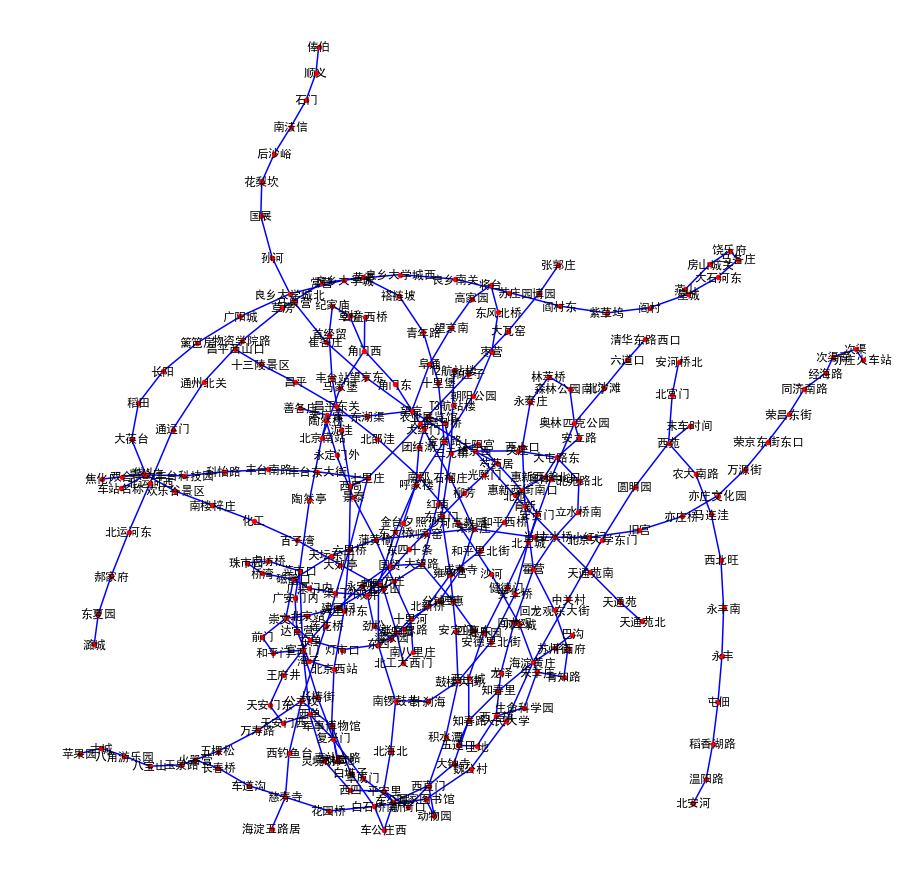

In [19]:
plt.figure(figsize=(12,12))
station_graph = nx.Graph(connections)
pos = nx.spring_layout(station_graph)
nx.draw(station_graph, pos, with_labels=True, node_size=20, node_color="red", node_shape="o", 
        font_size=12, font_color="black", font_weight="bold", width=1.5, edge_color="blue")
plt.show()

**Compare with the official map**

![](https://github.com/pchen12567/picture_store/blob/master/AI_For_NLP/subway_beijing.png?raw=true)

### 3.4 Build Search Agent

In [62]:
def is_goal(current_path, goal):
    return current_path[-1] == goal

In [6]:
def sort_path(cmp_func):
    def _sorted(pathes):
        return sorted(pathes, key=cmp_func)
    return _sorted

In [63]:
def search(graph, start, goal, search_strategy):
    if start == goal:
        return [start]
    
    pathes = [[start]]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        frontier_station = path[-1]
        
        if frontier_station in seen: continue
        
        successor_stations = graph[frontier_station]
        
        for station in successor_stations:
            if station in path: continue
            
            new_path = path + [station]
            
            pathes.append(new_path)
            
            if is_goal(new_path, goal): return new_path
        
        seen.add(frontier_station)
        pathes = search_strategy(pathes)

**3.4.1 Search When Start == Destination**

In [77]:
# Search when start == destination
path = search(connections, '朱辛庄', '朱辛庄', search_strategy=lambda n: n)
print('Total stations: {}'.format(len(path)))
print('Path detail: {}'.format(path))

Total stations: 1
Path detail: ['朱辛庄']


**3.4.2 Search With Empty Strategy**

In [141]:
# Search when strategy is empty
path = search(connections, '朱辛庄', '十里河', search_strategy=lambda n: n)
print('Total stations: {}'.format(len(path)))
print('Path detail: {}'.format(path))

Total stations: 21
Path detail: ['朱辛庄', '育知路', '平西府', '回龙观东大街', '霍营', '立水桥', '北苑', '望京西', '芍药居', '太阳宫', '三元桥', '亮马桥', '农业展览馆', '团结湖', '呼家楼', '金台夕照', '国贸', '双井', '劲松', '潘家园', '十里河']


**3.4.3 Search With Least Stations**

In [142]:
# Build function to get path length
def get_total_station(path):
    return len(path)

In [143]:
# Search when strategy is least stations
path = search(connections, '朱辛庄', '十里河', sort_path(get_total_station))
print('Total stations: {}'.format(len(path)))
print('Path detail: {}'.format(path))

Total stations: 21
Path detail: ['朱辛庄', '育知路', '平西府', '回龙观东大街', '霍营', '立水桥', '北苑', '望京西', '芍药居', '太阳宫', '三元桥', '亮马桥', '农业展览馆', '团结湖', '呼家楼', '金台夕照', '国贸', '双井', '劲松', '潘家园', '十里河']


**3.4.4 Search With Maximum Stations**

In [13]:
def get_as_much_station(path): 
    return -1 * len(path)

In [144]:
# Search when strategy is maximum stations
path = search(connections, '朱辛庄', '十里河', sort_path(get_as_much_station))
print('Total stations: {}'.format(len(path)))
print('Path detail: {}'.format(path))

Total stations: 58
Path detail: ['朱辛庄', '育知路', '平西府', '回龙观东大街', '霍营', '育新', '西小口', '永泰庄', '林萃桥', '森林公园南门', '奥林匹克公园', '奥体中心', '北土城', '安华桥', '安德里北街', '鼓楼大街', '安定门', '雍和宫', '东直门', '东四十条', '朝阳门', '建国门', '东单', '王府井', '天安门东', '天安门西', '西单', '复兴门', '南礼士路', '木樨地', '军事博物馆', '公主坟', '莲花桥', '六里桥', '七里庄', '西局', '泥洼', '丰台站', '首经贸', '纪家庙', '草桥', '角门西', '马家堡', '北京南站', '陶然亭', '菜市口', '宣武门', '和平门', '前门', '崇文门', '磁器口', '天坛东门', '蒲黄榆', '刘家窑', '宋家庄', '成寿寺', '分钟寺', '十里河']


### 3.5 Optimize Search Agent

In [145]:
def is_goal_agent(current_path, goal):
    return current_path[-1][0] == goal

In [146]:
def sort_path_agent(cmp_func):
    def _sorted(pathes):
        return sorted(pathes, key=cmp_func)
    return _sorted

In [98]:
def search_agent(graph, start, goal, search_strategy):
    '''
    pathes = [[path_1], [path_2], [path_3]...]
    path = [[station_1], [station_2], [station_3]...]
    station = [station_name, station_line]
    '''
    if start == goal:
        return [[start, '起点']]
        
    pathes = [[[start, '起点']]]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        frontier_station = path[-1]
        
        if frontier_station[0] in seen: continue
            
        successor_stations = graph[frontier_station[0]]
        
        for station_name, station_line in successor_stations.items():
            if station_name in [station[0] for station in path]: continue
            
            new_station = [station_name, station_line]
            
            new_path = path + [new_station]
            
            pathes.append(new_path)
            
            if is_goal_agent(new_path, goal): return new_path
            
        seen.add(frontier_station[0])
        pathes = search_strategy(pathes)

**3.5.1 Search With Least Exchange**

In [147]:
# Build function to get path exchange amount
def get_total_exchange(path):
    exchange = []
    for [station, line] in path[1:]:
        exchange.append(line)
    if (len(set(exchange))-1) <= 0:
        return 0
    else:
        return len(set(exchange))-1

In [148]:
# Search when strategy is Minimum Transfer Priority
path = search_agent(subway, '朱辛庄', '九龙山', sort_path_agent(get_total_exchange))
print('Total stations: {}'.format(len(path)))
print('Total exchange amount: {}'.format(get_total_exchange(path)))
print('Path detail: {}'.format(path))

Total stations: 26
Total exchange amount: 2
Path detail: [['朱辛庄', '起点'], ['育知路', '北京地铁8号线'], ['平西府', '北京地铁8号线'], ['回龙观东大街', '北京地铁8号线'], ['霍营', '北京地铁8号线'], ['育新', '北京地铁8号线'], ['西小口', '北京地铁8号线'], ['永泰庄', '北京地铁8号线'], ['林萃桥', '北京地铁8号线'], ['森林公园南门', '北京地铁8号线'], ['奥林匹克公园', '北京地铁8号线'], ['奥体中心', '北京地铁8号线'], ['北土城', '北京地铁8号线'], ['安华桥', '北京地铁8号线'], ['安德里北街', '北京地铁8号线'], ['鼓楼大街', '北京地铁8号线'], ['什刹海', '北京地铁8号线'], ['南锣鼓巷', '北京地铁8号线'], ['东四', '北京地铁6号线'], ['朝阳门', '北京地铁6号线'], ['东大桥', '北京地铁6号线'], ['呼家楼', '北京地铁6号线'], ['金台路', '北京地铁6号线'], ['红庙', '北京地铁14号线(东)'], ['大望路', '北京地铁14号线(东)'], ['九龙山', '北京地铁14号线(东)']]


**Compare With Baidu Map**

![](https://raw.githubusercontent.com/pchen12567/picture_store/master/AI_For_NLP/subway_01.jpeg)

**It is very interesting that the first route of recommendation from Baidu map is the same as this strategy.**

![](https://raw.githubusercontent.com/pchen12567/picture_store/master/AI_For_NLP/subway_02.jpeg)

**It is different from Baidu map by least exchange strategy because of without considering the walking method in my strategy.**

**3.5.2 Search With Least Stations**

In [92]:
# Search when strategy is least stations
path = search_agent(subway, '朱辛庄', '九龙山', sort_path_agent(get_total_station))
print('Total stations: {}'.format(len(path)))
print('Total exchange amount: {}'.format(get_total_exchange(path)))
print('Path detail: {}'.format(path))

Total stations: 19
Total exchange amount: 4
Path detail: [['朱辛庄', '起点'], ['育知路', '北京地铁8号线'], ['平西府', '北京地铁8号线'], ['回龙观东大街', '北京地铁8号线'], ['霍营', '北京地铁8号线'], ['立水桥', '北京地铁13号线'], ['北苑', '北京地铁13号线'], ['望京西', '北京地铁13号线'], ['芍药居', '北京地铁13号线'], ['太阳宫', '北京地铁10号线'], ['三元桥', '北京地铁10号线'], ['亮马桥', '北京地铁10号线'], ['农业展览馆', '北京地铁10号线'], ['团结湖', '北京地铁10号线'], ['呼家楼', '北京地铁10号线'], ['金台路', '北京地铁6号线'], ['红庙', '北京地铁14号线(东)'], ['大望路', '北京地铁14号线(东)'], ['九龙山', '北京地铁14号线(东)']]


**3.5.3 Search With Least Exchage & Least Stations**

In [149]:
def get_comprehensive_path(path):
    return get_total_exchange(path) + get_total_station(path)

In [150]:
# Search when strategy is least exchange amount & least stations
path = search_agent(subway, '朱辛庄', '九龙山', sort_path_agent(get_comprehensive_path))
print('Total stations: {}'.format(len(path)))
print('Total exchange amount: {}'.format(get_total_exchange(path)))
print('Path detail: {}'.format(path))

Total stations: 19
Total exchange amount: 3
Path detail: [['朱辛庄', '起点'], ['育知路', '北京地铁8号线'], ['平西府', '北京地铁8号线'], ['回龙观东大街', '北京地铁8号线'], ['霍营', '北京地铁8号线'], ['立水桥', '北京地铁13号线'], ['北苑', '北京地铁13号线'], ['望京西', '北京地铁13号线'], ['芍药居', '北京地铁13号线'], ['太阳宫', '北京地铁10号线'], ['三元桥', '北京地铁10号线'], ['亮马桥', '北京地铁10号线'], ['农业展览馆', '北京地铁10号线'], ['团结湖', '北京地铁10号线'], ['呼家楼', '北京地铁10号线'], ['金台夕照', '北京地铁10号线'], ['国贸', '北京地铁10号线'], ['双井', '北京地铁10号线'], ['九龙山', '北京地铁7号线']]


**3.5.4 Search When Start == Destination**

In [99]:
# Search when start == destination
path = search_agent(subway, '朱辛庄', '朱辛庄', search_strategy=lambda n: n)
print('Total stations: {}'.format(len(path)))
print('Total exchange amount: {}'.format(get_total_exchange(path)))
print('Path detail: {}'.format(path))

Total stations: 1
Total exchange amount: 0
Path detail: [['朱辛庄', '起点']]


**3.5.5 Search With Maximum Stations**

In [151]:
# Search when strategy is maximum stations
path = search_agent(subway, '朱辛庄', '九龙山', sort_path_agent(get_as_much_station))
print('Total stations: {}'.format(len(path)))
print('Total exchange amount: {}'.format(get_total_exchange(path)))
print('Path detail: {}'.format(path))

Total stations: 62
Total exchange amount: 8
Path detail: [['朱辛庄', '起点'], ['育知路', '北京地铁8号线'], ['平西府', '北京地铁8号线'], ['回龙观东大街', '北京地铁8号线'], ['霍营', '北京地铁8号线'], ['育新', '北京地铁8号线'], ['西小口', '北京地铁8号线'], ['永泰庄', '北京地铁8号线'], ['林萃桥', '北京地铁8号线'], ['森林公园南门', '北京地铁8号线'], ['奥林匹克公园', '北京地铁8号线'], ['奥体中心', '北京地铁8号线'], ['北土城', '北京地铁8号线'], ['安华桥', '北京地铁8号线'], ['安德里北街', '北京地铁8号线'], ['鼓楼大街', '北京地铁8号线'], ['安定门', '北京地铁2号线'], ['雍和宫', '北京地铁2号线'], ['东直门', '北京地铁2号线'], ['东四十条', '北京地铁2号线'], ['朝阳门', '北京地铁2号线'], ['建国门', '北京地铁2号线'], ['东单', '北京地铁1号线'], ['王府井', '北京地铁1号线'], ['天安门东', '北京地铁1号线'], ['天安门西', '北京地铁1号线'], ['西单', '北京地铁1号线'], ['复兴门', '北京地铁1号线'], ['南礼士路', '北京地铁1号线'], ['木樨地', '北京地铁1号线'], ['军事博物馆', '北京地铁1号线'], ['公主坟', '北京地铁1号线'], ['莲花桥', '北京地铁10号线'], ['六里桥', '北京地铁10号线'], ['七里庄', '北京地铁9号线'], ['西局', '北京地铁14号线(西)'], ['泥洼', '北京地铁10号线'], ['丰台站', '北京地铁10号线'], ['首经贸', '北京地铁10号线'], ['纪家庙', '北京地铁10号线'], ['草桥', '北京地铁10号线'], ['角门西', '北京地铁10号线'], ['马家堡', '北京地铁4号线'], ['北京南站', '北京地铁4号线'], ['陶然亭', '北京地铁4号线'], ['菜市口', '北京地铁4号线'], ['

----

## 4. Future Work

1. Elicit data of distance between each station to implement the **Shortest Distance Priority** search strategy.
2. Elicit data of time between each station to implement the **Shortest Time Priority** search strategy.
3. Elicit data of stations location to optimize the station grap map.